In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import gc; gc.enable()
import lightgbm as lgb

from GridSearcher import data_loader, model_loader, fit_params, get_oof_predictions, clip_rmse

In [3]:
DATA_TYPE = 'all_dense'
IS_REGRESSION = True
SEED = 719

In [4]:
dl = data_loader(data_type=DATA_TYPE, is_regression=IS_REGRESSION, is_train=True)
res = dl.load_text_oof_data()
res.head()

Loading:  text pred data/text_lgb_oof_val_pred.csv text pred data/text_lgb_oof_test_pred.csv
Loading:  text pred data/text_fm_oof_val_pred.csv text pred data/text_fm_oof_test_pred.csv
Loading:  text pred data/text_rg_oof_val_pred.csv text pred data/text_rg_oof_test_pred.csv
Loading:  text pred data/seqno_rg_oof_val_pred.csv text pred data/seqno_rg_oof_test_pred.csv
Loading:  text pred data/seqno_price_img_rg_oof_val_pred.csv text pred data/seqno_price_img_rg_oof_test_pred.csv
Loading:  text pred data/seqno_img_rg_oof_val_pred.csv text pred data/seqno_img_rg_oof_test_pred.csv
Loading:  text pred data/price_rg_oof_val_pred.csv text pred data/price_rg_oof_test_pred.csv
Loading:  text pred data/price_seqno_rg_oof_val_pred.csv text pred data/price_seqno_rg_oof_test_pred.csv
Loading:  text pred data/price_img_rg_oof_val_pred.csv text pred data/price_img_rg_oof_test_pred.csv
Loading:  text pred data/img1_rg_oof_val_pred.csv text pred data/img1_rg_oof_test_pred.csv
Loading:  text pred data/seq

,text_lgb_pred,text_fm_pred,text_rg_pred,seqno_rg_pred,seqno_price_img_rg_pred,seqno_img_rg_pred,price_rg_pred,price_seqno_rg_pred,price_img_rg_pred,img1_rg_pred,seqno_lr_pred,seqno_price_img_lr_pred,seqno_img_lr_pred,price_lr_pred,price_seqno_lr_pred,price_img_lr_pred,img1_lr_pred,all_rg_pred
0,0.039400,0.033477,0.040231,0.148327,0.095290,0.095360,0.136874,0.146399,0.091020,0.090985,0.123075,0.0,0.081687,0.117420,0.109973,0.079708,0.079773,0.079998
1,0.038513,0.020017,0.010345,0.157599,0.067388,0.068340,0.139041,0.157191,0.051256,0.051753,0.129950,0.0,0.039818,0.118184,0.194528,0.036511,0.036658,0.030764
2,0.033834,0.016469,0.012967,0.137540,0.052525,0.053233,0.135410,0.134739,0.054497,0.055355,0.115472,0.0,0.040393,0.116906,0.094447,0.040747,0.040944,0.025177
3,0.167353,0.176583,0.168167,0.144586,0.138742,0.141495,0.137352,0.143190,0.130787,0.133506,0.120390,0.0,0.148028,0.117588,0.107295,0.140875,0.142747,0.258386
4,0.198803,0.202153,0.189000,0.154022,0.102841,0.104558,0.135410,0.150660,0.087680,0.089077,0.127260,0.0,0.086487,0.116906,0.098370,0.079446,0.080094,0.202085


In [6]:
res.shape

(2011862, 18)

In [5]:
res.to_csv('oof_preds_0525.csv', index=False)

In [3]:
dl = data_loader(data_type=DATA_TYPE, is_regression=IS_REGRESSION, is_train=True)
train_X, train_y = dl.load()

Arguments: all_dense True True
target loaded
Loading:  text pred data/text_lgb_oof_val_pred.csv text pred data/text_lgb_oof_test_pred.csv
Loading:  text pred data/text_fm_oof_val_pred.csv text pred data/text_fm_oof_test_pred.csv
Loading:  text pred data/text_rg_oof_val_pred.csv text pred data/text_rg_oof_test_pred.csv


In [4]:
train_X.head(5)

,region,city,parent_category_name,category_name,param_1,param_2,param_3,price,item_seq_number,user_type,...,price_binned,price_binned_dp_mean_enc,price_binned_dp_std_enc,item_seq_number_binned_dp_mean_enc,item_seq_number_binned_dp_std_enc,image_top_1_dp_mean_enc,image_top_1_dp_std_enc,text_lgb_pred,text_fm_pred,text_rg_pred
0,17,1220,4,10,109,103,156,0.486577,0.284494,1,...,18,0.103211,0.304236,0.136124,0.342928,0.080851,0.272897,0.039400,0.033477,0.040231
1,6,225,0,41,41,241,875,0.439237,0.249218,1,...,5,0.102082,0.302761,0.132964,0.339541,0.034548,0.182654,0.038513,0.020017,0.010345
2,15,685,4,29,125,103,121,0.518554,0.325533,1,...,32,0.131648,0.338111,0.120717,0.325814,0.040648,0.197500,0.033834,0.016469,0.012967
3,14,1039,3,43,33,88,875,0.476137,0.298728,1,...,14,0.084237,0.277748,0.132689,0.339248,0.141994,0.349572,0.167353,0.176583,0.168167
4,27,1617,4,29,203,122,875,0.518554,0.262826,1,...,32,0.131648,0.338111,0.138783,0.345726,0.081946,0.274459,0.198803,0.202153,0.189000


In [5]:
train_X.shape

(1503424, 139)

In [6]:
df = pd.DataFrame()
df.loc[:, 'truth'] = train_y
df.loc[:, 'text_lgb_pred'] = np.clip(train_X.text_lgb_pred, 0., 1.)
df.loc[:, 'text_fm_pred'] = np.clip(train_X.text_fm_pred, 0., 1.)
df.loc[:, 'text_rg_pred'] = np.clip(train_X.text_rg_pred, 0., 1.)

avg = (train_X.text_lgb_pred + train_X.text_fm_pred + train_X.text_rg_pred) / 3.
df.loc[:,'avg'] = np.clip(avg, 0, 1)
del train_X; gc.collect()

100

In [10]:
print(clip_rmse(df.truth, df.text_rg_pred))

0.227379073323


In [8]:
df = df.sample(frac=0.0005, replace=True)
df = df.sort_values('truth').reset_index()

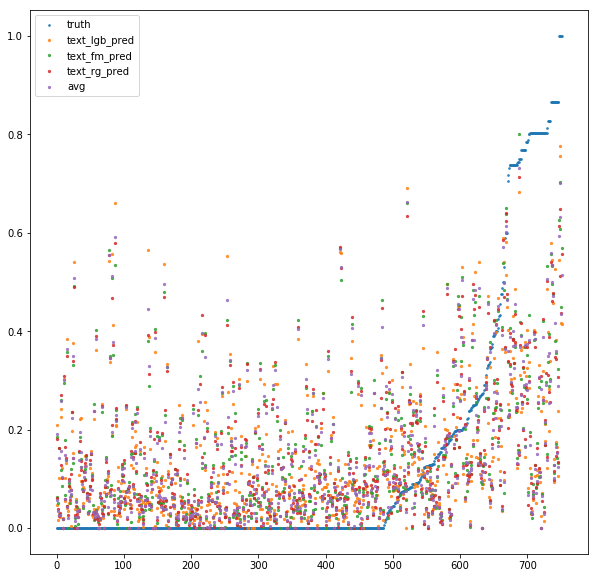

In [9]:
plt.figure(figsize=(10,10))
alpha=.8
s=5
plt.scatter(np.arange(df.shape[0]), df.truth, label='truth', alpha=.8, s=3)
plt.scatter(np.arange(df.shape[0]), df.text_lgb_pred, label='text_lgb_pred', alpha=alpha, s=s)
plt.scatter(np.arange(df.shape[0]), df.text_fm_pred, label='text_fm_pred', alpha=alpha, s=s)
plt.scatter(np.arange(df.shape[0]), df.text_rg_pred, label='text_rg_pred', alpha=alpha, s=s)
plt.scatter(np.arange(df.shape[0]), df.avg, label='avg', alpha=alpha, s=s)

plt.legend()
plt.show()

In [10]:
df[['text_lgb_pred','text_fm_pred','text_rg_pred']].corr()

,text_lgb_pred,text_fm_pred,text_rg_pred
text_lgb_pred,1.000000,0.952633,0.955035
text_fm_pred,0.952633,1.000000,0.994450
text_rg_pred,0.955035,0.994450,1.000000
